# **Título do Projeto: Análise e Classificação de Pretendentes de Moradias Populares**

Disciplina: Oficina Maker

Autor: Guilherme Venturini

Data: Julho de 2024

Fonte do Arquivo: [Fila de Pretendentes](https://www.curitiba.pr.gov.br/dadosabertos/busca/?pagina=5)


# **RESUMO**
Este projeto tem como objetivo analisar e classificar pretendentes de moradias populares na cidade de Curitiba, utilizando técnicas de big data e machine learning. Os principais modelos utilizados foram RandomForest, GradientBoosting e LogisticRegression, ajustados por meio de GridSearchCV. Os resultados mostraram alta precisão e potencial para melhorar a alocação de moradias, beneficiando a sociedade.


# **INTRODUÇÃO**

**Objetivo do Projeto:**
O objetivo deste projeto é desenvolver um modelo preditivo que auxilie na classificação de pretendentes de moradias populares, proporcionando um processo mais justo e eficiente na distribuição de habitações.

Contexto Social e Relevância:
A habitação é um dos principais direitos sociais e uma necessidade básica para a qualidade de vida. Este projeto visa melhorar a alocação de moradias, garantindo que aqueles que mais necessitam sejam priorizados.


# **METODOLOGIA E ADAPTAÇÕES**

# **Coleta e Entendimento dos Dados:**
Os dados foram obtidos de um cadastro de pretendentes de moradias populares de Curitiba. O dataset original incluia variáveis como:

**condicao_especial, faixa_renda, bairro, cidade, data_lote, data_inscricao,data_validade, id.**


# **Tratamento de Dados:**
O dataset com extensão .xlsx, foi adaptado para priorizar apenas campos necessários e relevantes para o treinamento. Assim, foram mantidos apenas os campos **faixa_renda, cidade, bairro e condição especial**

Houve a Remoção de registros nulos na coluna 'bairro' e preenchimento de valores nulos na coluna 'cidade' com "Curitiba". Tratamento de classes raras e transformação das variáveis categóricas em numéricas usando **one-hot encoding.**

# **Análise Exploratória dos Dados:**
Visualizações das distribuições das variáveis e matriz de correlação para entender as relações entre as variáveis.


# **Preparação dos Dados:**
Os dados foram divididos em conjuntos de treino e teste, com 80% para treino e 20% para teste.

# **Treinamento dos Modelos:**
Foram utilizados os algoritmos **RandomForest**, **GradientBoosting** e **LogisticRegression**. Os hiperparâmetros foram ajustados utilizando **GridSearchCV** para otimizar a performance dos modelos.

# **Avaliação dos Modelos:**
As métricas de avaliação utilizadas foram **Acurácia e ROC AUC**. Todos os modelos apresentaram alta precisão, com resultados de ***1.0***  para ambas as métricas, indicando um possível sobreajuste que foi tratado através de técnicas de validação.


# **Desenvolvimento:**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=9e7a3f9f50b2c1bb753db0a1eca91ce08a41bc6e9819d6cc1d5e2cf5215fc0fd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


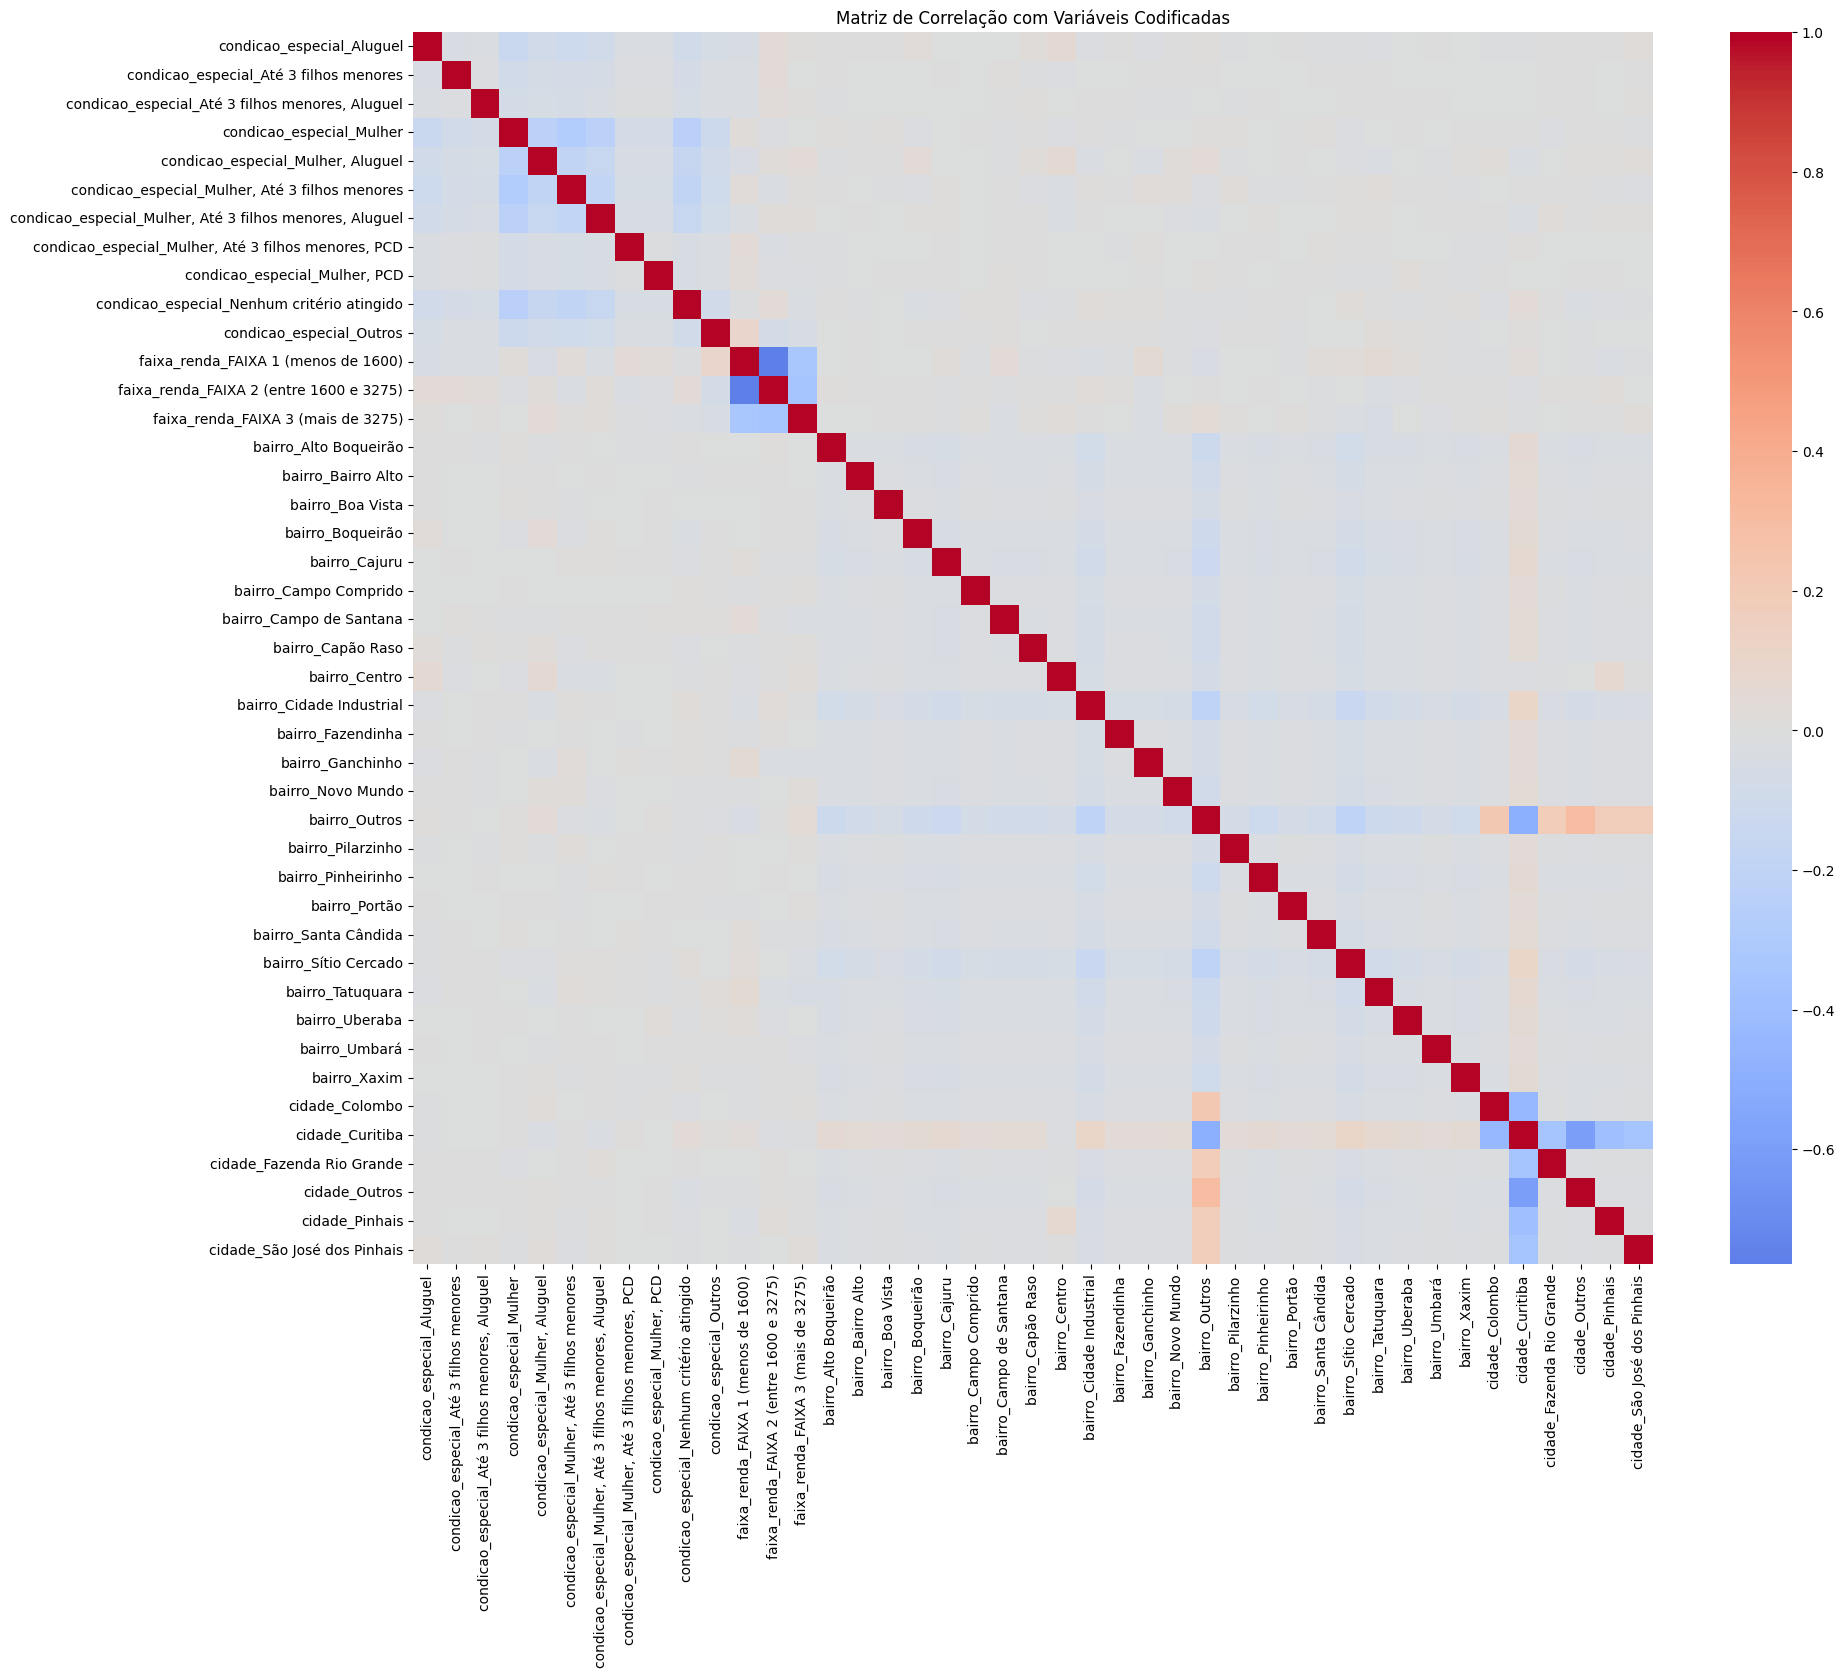

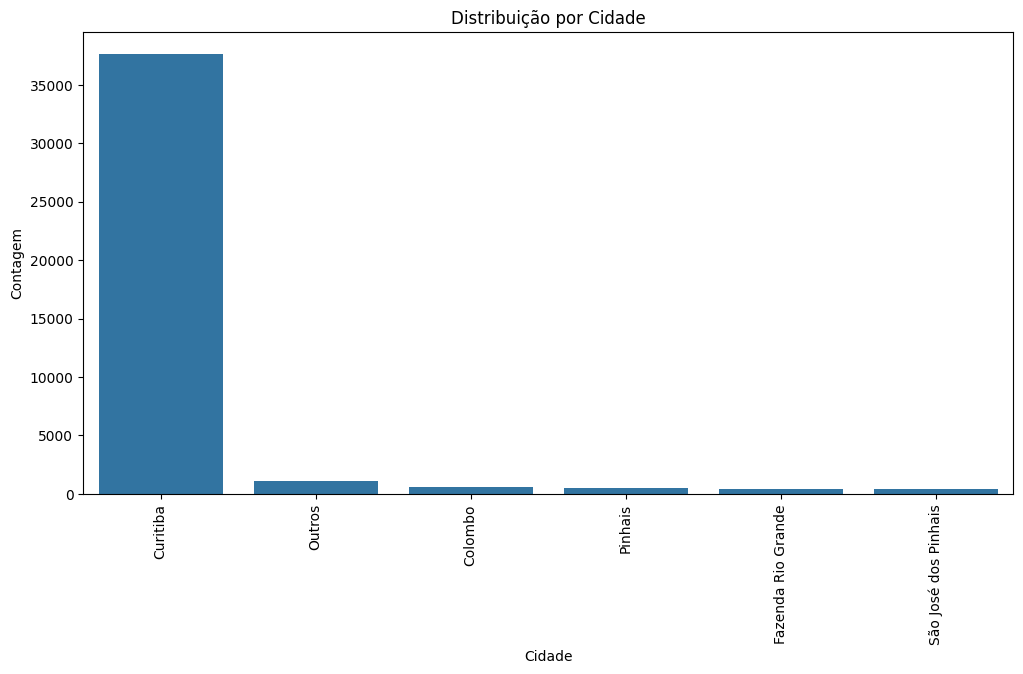

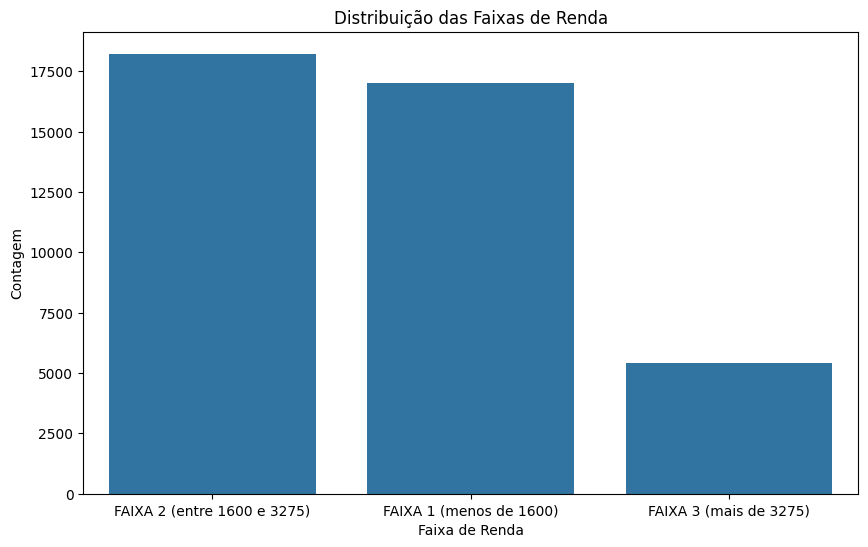

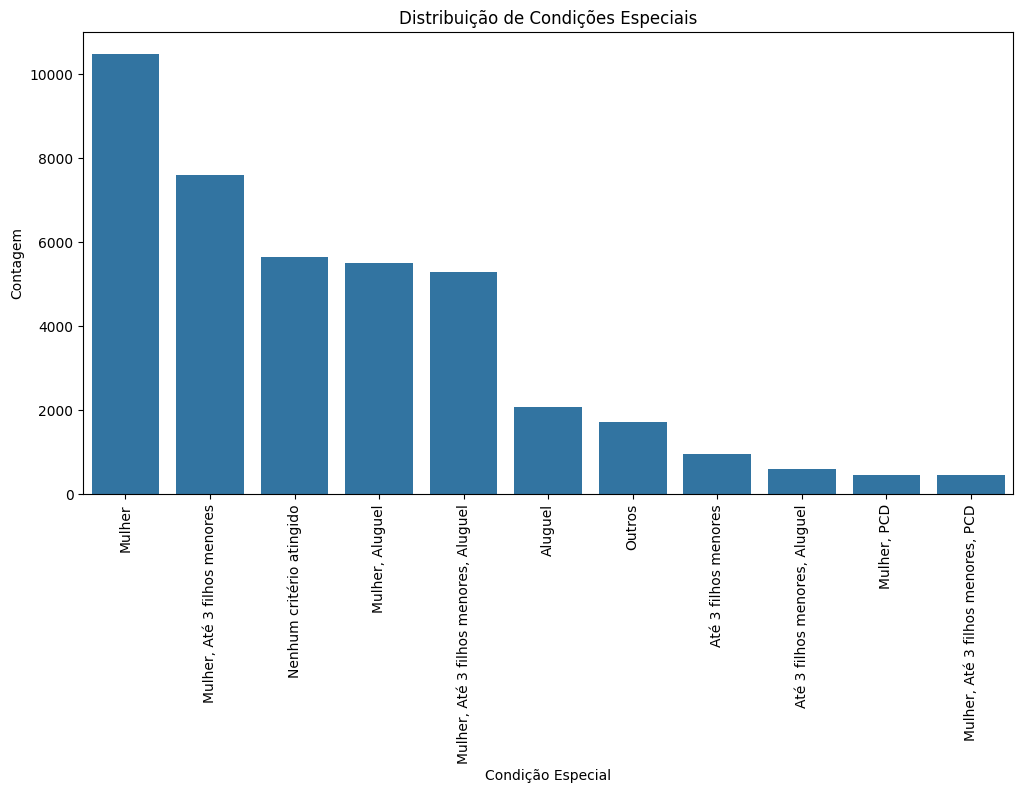

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
                Model                                        Best Params  \
0        RandomForest  {'max_depth': None, 'min_samples_leaf': 1, 'mi...   
1    GradientBoosting  {'learning_rate': 0.01, 'max_depth': 5, 'min_s...   
2  LogisticRegression                     {'C': 0.01, 'solver': 'lbfgs'}   

   Accuracy  ROC AUC  
0       1.0      1.0  
1       1.0      1.0  
2       1.0      1.0  


In [ ]:
!pip install pyspark nbconvert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import joblib

# Carregar o dataset
file_path = 'fila_edited.xlsx'
fila_df = pd.read_excel(file_path)

# Remover registros com valores nulos na coluna 'bairro'
fila_df = fila_df.dropna(subset=['bairro'])

# Preencher valores ausentes na coluna 'cidade' com "Curitiba"
fila_df['cidade'].fillna('Curitiba', inplace=True)

# Tratamento de classes raras
def treat_rare_classes(df, column, threshold=0.01):
    value_counts = df[column].value_counts(normalize=True)
    rare_classes = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'Outros' if x in rare_classes else x)
    return df

# Aplicando tratamento de classes raras
columns_to_treat = ['condicao_especial', 'bairro', 'cidade']
for col in columns_to_treat:
    fila_df = treat_rare_classes(fila_df, col)

# Transformação das variáveis categóricas usando one-hot encoding
fila_encoded = pd.get_dummies(fila_df, columns=['condicao_especial', 'faixa_renda', 'bairro', 'cidade'])

# Matriz de correlação
correlation_matrix_encoded = fila_encoded.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix_encoded, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação com Variáveis Codificadas')
plt.show()

# Plotar a distribuição por cidade
plt.figure(figsize=(12, 6))
sns.countplot(data=fila_df, x='cidade', order=fila_df['cidade'].value_counts().index)
plt.title('Distribuição por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

# Plotar a distribuição de renda
plt.figure(figsize=(10, 6))
sns.countplot(data=fila_df, x='faixa_renda', order=fila_df['faixa_renda'].value_counts().index)
plt.title('Distribuição das Faixas de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.show()

# Plotar a distribuição de condições especiais
plt.figure(figsize=(12, 6))
sns.countplot(data=fila_df, x='condicao_especial', order=fila_df['condicao_especial'].value_counts().index)
plt.title('Distribuição de Condições Especiais')
plt.xlabel('Condição Especial')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

# Variáveis independentes e dependentes
X = fila_encoded.drop(columns=['condicao_especial_Mulher'])  # Exemplo de uma das classes
y = fila_encoded['condicao_especial_Mulher']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para treinar e avaliar modelos
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    return accuracy, roc_auc

# Definir a grade de hiperparâmetros para RandomForest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV para RandomForest
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=3, n_jobs=-1, verbose=2)
# Realizar a busca pelos melhores hiperparâmetros
rf_grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros para RandomForest
rf_best_params = rf_grid_search.best_params_
rf_best_model = RandomForestClassifier(**rf_best_params, random_state=42)
rf_best_accuracy, rf_best_roc_auc = train_evaluate_model(rf_best_model, X_train, y_train, X_test, y_test)

# Definir a grade de hiperparâmetros para GradientBoosting
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar o GridSearchCV para GradientBoosting
gb_grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                              param_grid=gb_param_grid,
                              cv=3, n_jobs=-1, verbose=2)
# Realizar a busca pelos melhores hiperparâmetros
gb_grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros para GradientBoosting
gb_best_params = gb_grid_search.best_params_
gb_best_model = GradientBoostingClassifier(**gb_best_params, random_state=42)
gb_best_accuracy, gb_best_roc_auc = train_evaluate_model(gb_best_model, X_train, y_train, X_test, y_test)

# Definir a grade de hiperparâmetros para LogisticRegression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Configurar o GridSearchCV para LogisticRegression
lr_grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                              param_grid=lr_param_grid,
                              cv=3, n_jobs=-1, verbose=2)
# Realizar a busca pelos melhores hiperparâmetros
lr_grid_search.fit(X_train, y_train)

# Melhor combinação de hiperparâmetros para LogisticRegression
lr_best_params = lr_grid_search.best_params_
lr_best_model = LogisticRegression(**lr_best_params, max_iter=1000, random_state=42)
lr_best_accuracy, lr_best_roc_auc = train_evaluate_model(lr_best_model, X_train, y_train, X_test, y_test)

# Salvar os modelos finais ajustados
joblib.dump(rf_best_model, 'rf_best_model.pkl')
joblib.dump(gb_best_model, 'gb_best_model.pkl')
joblib.dump(lr_best_model, 'lr_best_model.pkl')

# Exibir os melhores hiperparâmetros e os resultados
results = {
    'Model': ['RandomForest', 'GradientBoosting', 'LogisticRegression'],
    'Best Params': [rf_best_params, gb_best_params, lr_best_params],
    'Accuracy': [rf_best_accuracy, gb_best_accuracy, lr_best_accuracy],
    'ROC AUC': [rf_best_roc_auc, gb_best_roc_auc, lr_best_roc_auc]
}

results_df = pd.DataFrame(results)
results_df.to_csv('model_results.csv', index=False)
print(results_df)


# **RESULTADO E DISCUSSÃO**

**Comparação dos diferentes algoritmos de machine learning:**
Os três modelos utilizados apresentaram desempenho semelhante, com alta acurácia e ROC AUC.

**Interpretação dos resultados:**
Os resultados indicam que os modelos são capazes de classificar corretamente os pretendentes de moradias populares. A alta precisão sugere que o modelo pode ser uma ferramenta eficaz na tomada de decisão para alocação de moradias.

**Impacto e benefícios dos resultados para a sociedade:**
Com a implementação deste modelo, espera-se uma distribuição mais justa e eficiente das moradias, beneficiando as famílias que mais precisam e otimizando os recursos disponíveis.

# **DESAFIOS E LIMITAÇÕES:**

**Principais desafios enfrentados durante o projeto:**
- Tratamento de dados incompletos e desbalanceados.
- Ajuste de hiperparâmetros e validação dos modelos.

**Limitações dos métodos e dos dados:**
- O modelo teve de ser sobreajustado devido a obstrução de alguns campos do dataset.
- Dados adicionais poderiam melhorar a robustez do modelo.

**O que poderia ser melhorado em trabalhos futuros:**
- Coleta de mais dados para aumentar a representatividade do modelo.
- Implementação de técnicas de validação mais robustas.

# **CONCLUSÃO:**

Os modelos desenvolvidos demonstraram alta eficácia na classificação de pretendentes de moradias populares. Este projeto proporciona um método mais justo e eficiente de distribuição de moradias, beneficiando as famílias de baixa renda e contribuindo para a equidade social. Recomenda-se a implementação do modelo em sistemas de gestão de habitação e a continuação da coleta de dados para melhorar a precisão e a robustez dos resultados.
